In [1]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns

# Rent changes

In [2]:
df = pd.read_csv("ZillowData/Neighborhood_Zri_AllHomesPlusMultifamily.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,1,1322.0,1340.0,1346.0,...,1731,1723,1718,1715,1721,1750,1789,1822,1834,1836
1,112345,Maryvale,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,2,895.0,894.0,891.0,...,1140,1141,1143,1144,1148,1161,1179,1196,1203,1206
2,192689,Paradise,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,3,1167.0,1160.0,1154.0,...,1280,1282,1284,1285,1290,1307,1326,1342,1347,1351
3,270958,Upper West Side,New York,NY,New York-Newark-Jersey City,New York County,4,3432.0,3418.0,3383.0,...,3655,3633,3626,3626,3647,3721,3826,3922,3957,3957
4,118208,South Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,5,1754.0,1724.0,1700.0,...,2411,2418,2430,2440,2448,2471,2506,2536,2548,2544


In [7]:
#seleting illinois 
df = df[df.State == "IL"]
df.head()

AttributeError: 'DataFrame' object has no attribute 'State'

In [3]:
#specifically the metro area
df = df[df.Metro == "Chicago-Naperville-Elgin"]
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
52,269592,Logan Square,Chicago,IL,Chicago-Naperville-Elgin,Cook County,53,1587.0,1572.0,1542.0,...,1661,1657,1655,1654,1661,1686,1709,1722,1719,1719
86,403117,Little Village,Chicago,IL,Chicago-Naperville-Elgin,Cook County,87,1286.0,1318.0,1326.0,...,1394,1393,1392,1392,1394,1404,1418,1428,1431,1425
103,403169,West Rogers Park,Chicago,IL,Chicago-Naperville-Elgin,Cook County,104,1538.0,1523.0,1500.0,...,1532,1533,1534,1534,1537,1549,1566,1578,1579,1575
140,403120,South Austin,Chicago,IL,Chicago-Naperville-Elgin,Cook County,141,1466.0,1467.0,1437.0,...,1446,1447,1448,1448,1453,1472,1493,1509,1509,1507
149,269566,Albany Park,Chicago,IL,Chicago-Naperville-Elgin,Cook County,150,1566.0,1541.0,1517.0,...,1568,1565,1564,1563,1568,1589,1613,1628,1626,1619


In [4]:
df.drop(columns = ["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], inplace = True)

In [5]:
df.index.unique()

Int64Index([  52,   86,  103,  140,  149,  154,  158,  164,  196,  197,
            ...
            5772, 5822, 5921, 5968, 6117, 6131, 6173, 6567, 6576, 6582],
           dtype='int64', length=173)

In [6]:
df.index = df.RegionName
df.drop(columns = "RegionName", inplace = True)

In [8]:
df.loc["Logan Square"]

2010-11    1587.0
2010-12    1572.0
2011-01    1542.0
2011-02    1515.0
2011-03    1487.0
2011-04    1466.0
2011-05    1456.0
2011-06    1448.0
2011-07    1454.0
2011-08    1464.0
2011-09    1477.0
2011-10    1478.0
2011-11    1465.0
2011-12    1446.0
2012-01    1425.0
2012-02    1419.0
2012-03    1426.0
2012-04    1438.0
2012-05    1449.0
2012-06    1443.0
2012-07    1435.0
2012-08    1432.0
2012-09    1447.0
2012-10    1465.0
2012-11    1468.0
2012-12    1460.0
2013-01    1440.0
2013-02    1428.0
2013-03    1425.0
2013-04    1451.0
            ...  
2016-10    1686.0
2016-11    1678.0
2016-12    1666.0
2017-01    1649.0
2017-02    1635.0
2017-03    1632.0
2017-04    1638.0
2017-05    1658.0
2017-06    1678.0
2017-07    1701.0
2017-08    1716.0
2017-09    1728.0
2017-10    1728.0
2017-11    1718.0
2017-12    1700.0
2018-01    1682.0
2018-02    1673.0
2018-03    1670.0
2018-04    1669.0
2018-05    1665.0
2018-06    1661.0
2018-07    1657.0
2018-08    1655.0
2018-09    1654.0
2018-10   

In [9]:
X = df.columns
Y = df.loc["Logan Square"].astype(float)

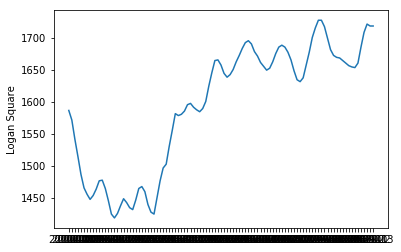

In [10]:
sns.lineplot(X, Y)

In [11]:
def plotRents(df, city0, city1, city2):
    trace0 = go.Scatter(
        x = df.columns,
        y = df.loc[city0].astype(float),
        mode = 'markers',
        name = city0
    )
    trace1 = go.Scatter(
        x = df.columns,
        y = df.loc[city1].astype(float),
        mode = 'lines+markers',
        name = city1
    )
    trace2 = go.Scatter(
        x = df.columns,
        y = df.loc[city2].astype(float),
        mode = 'lines',
        name = city2
    )

    data = [trace0, trace1, trace2]

    # Plot and embed in ipython notebook!
    py.plot(data)

In [12]:
plotRents(df, "Logan Square", "Wicker Park", "Chinatown")

PlotlyRequestError: No message

# Purchase/Rent

In [4]:
df = pd.read_csv("ZillowData/Neighborhood_PriceToRentRatio_AllHomes.csv", encoding = 'unicode_escape')
df = df[df.Metro == "Chicago-Naperville-Elgin"]

In [5]:
df.drop(columns = ["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], inplace = True)
df.index = df.RegionName
df.drop(columns = "RegionName", inplace = True)
plotRents(df, "Logan Square", "O'Hare", "Chinatown")

In [7]:
df.sort_values(by = "2019-03")

,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
RegionName,,,,,,,,,,,,,,,,,,,,,
Hegewisch,7.39,7.23,7.20,7.04,6.79,6.62,6.51,6.45,6.61,6.60,...,7.22,7.29,6.91,6.82,6.74,6.50,6.46,6.49,6.43,6.34
Fernwood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.22,7.14,7.13,7.13,7.14,7.20,7.31,7.34,7.22,7.21
Burnside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.85,8.85,9.00,8.84,8.70,8.37,8.24,8.07,7.90,7.83
South Chicago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.06,7.97,8.05,8.41,8.46,8.27,8.17,8.11,8.02,8.03
Washington Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.13,7.14,7.78,8.66,8.71,8.45,8.15,8.24,8.36,8.25
O'Hare,8.23,8.12,8.05,7.96,8.01,7.92,7.76,7.64,7.55,7.39,...,8.58,8.66,8.65,8.67,8.58,8.34,8.35,8.30,8.31,8.35
West Chesterfield,8.57,8.44,8.21,8.02,7.88,7.75,7.65,7.64,7.58,7.62,...,9.55,9.74,9.74,9.49,9.45,9.26,9.14,8.99,8.82,8.67
Pill Hill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.73,8.70,8.90,9.12,8.99,8.84,8.77,8.74,8.70,8.69
Gresham,8.44,8.33,8.26,8.11,8.06,8.04,7.91,7.75,7.50,7.46,...,8.78,8.86,8.89,8.90,8.97,8.90,9.09,9.04,8.95,8.84


# All Homes

# All Homes MultiFamilies

# Break Even PR

In [77]:
df = pd.read_csv("ZillowData/BreakEven_PR_2018-03.csv", encoding = 'unicode_escape')
df = df[df["StateName"] == "IL"]

In [82]:
#df[df["CBSATitle"] == "\"Chicago-Naperville-Elgin, IL-IN-WI\""]
df = df[df["City"] == "Chicago"].sort_values(by = "MedPR")
df = df[df["RegionType"] == "Neighborhood"]
df

,RegionType,RegionID,RegionName,SizeRank,City,CountyName,Metro,CBSATitle,StateName,BEPropCount,SampleRate,MedBE,Breakeven,MedPR
34265,Neighborhood,403377,Fernwood,1125,Chicago,Cook,Chicago,"""Chicago-Naperville-Elgin, IL-IN-WI""",IL,529,0.164,0.630274,0 year(s) and 8 month(s),4.633759
27369,Neighborhood,138166,East Side,494,Chicago,Cook,Chicago,"""Chicago-Naperville-Elgin, IL-IN-WI""",IL,826,0.164,1.055059,1 year(s) and 1 month(s),6.907960
27372,Neighborhood,138732,Hegewisch,964,Chicago,Cook,Chicago,"""Chicago-Naperville-Elgin, IL-IN-WI""",IL,2010,0.825,0.831468,0 year(s) and 10 month(s),6.995106
31277,Neighborhood,276138,Woodlawn,860,Chicago,Cook,Chicago,"""Chicago-Naperville-Elgin, IL-IN-WI""",IL,969,0.544,1.103840,1 year(s) and 1 month(s),7.161134
34267,Neighborhood,403379,Rosemoor,1251,Chicago,Cook,Chicago,"""Chicago-Naperville-Elgin, IL-IN-WI""",IL,420,0.164,1.149804,1 year(s) and 2 month(s),7.404832
29255,Neighborhood,269571,Gresham,153,Chicago,Cook,Chicago,"""Chicago-Naperville-Elgin, IL-IN-WI""",IL,1900,0.224,1.090673,1 year(s) and 1 month(s),7.490659
34264,Neighborhood,403376,Longwood Manor,1506,Chicago,Cook,Chicago,"""Chicago-Naperville-Elgin, IL-IN-WI""",IL,452,0.164,1.225147,1 year(s) and 3 month(s),7.648369
34256,Neighborhood,403361,West Chesterfield,2214,Chicago,Cook,Chicago,"""Chicago-Naperville-Elgin, IL-IN-WI""",IL,419,0.237,1.233348,1 year(s) and 3 month(s),7.680297
34149,Neighborhood,403148,Marquette Park,309,Chicago,Cook,Chicago,"""Chicago-Naperville-Elgin, IL-IN-WI""",IL,660,0.160,1.195083,1 year(s) and 2 month(s),8.109299
30578,Neighborhood,274178,Kenwood,1407,Chicago,Cook,Chicago,"""Chicago-Naperville-Elgin, IL-IN-WI""",IL,879,0.404,1.195805,1 year(s) and 2 month(s),8.139845


In [86]:
df[df["RegionName"] == "Harlem"]

,RegionType,RegionID,RegionName,SizeRank,City,CountyName,Metro,CBSATitle,StateName,BEPropCount,SampleRate,MedBE,Breakeven,MedPR
